In [4]:
# Import necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [9]:
import os
file_path = os.path.join(os.getcwd(), "events.csv")
data = pd.read_csv(file_path)

# Inspect the data
print("Dataset Info:")
print(data.info())

print("\nSample Rows:")
print(data.head())

# Check for missing values
missing_values = data.isnull().sum()
print("\nMissing Values:")
print(missing_values)

# Check for duplicates
duplicates = data.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

# Summary statistics
print("\nSummary Statistics:")
print(data.describe(include='all'))


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885129 entries, 0 to 885128
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   event_time     885129 non-null  object 
 1   event_type     885129 non-null  object 
 2   product_id     885129 non-null  int64  
 3   category_id    885129 non-null  int64  
 4   category_code  648910 non-null  object 
 5   brand          672765 non-null  object 
 6   price          885129 non-null  float64
 7   user_id        885129 non-null  int64  
 8   user_session   884964 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 60.8+ MB
None

Sample Rows:
                event_time event_type  product_id          category_id  \
0  2020-09-24 11:57:06 UTC       view     1996170  2144415922528452715   
1  2020-09-24 11:57:26 UTC       view      139905  2144415926932472027   
2  2020-09-24 11:57:27 UTC       view      215454  2144415927158964449   
3  

In [3]:
# Convert event_time to datetime
data['event_time'] = pd.to_datetime(data['event_time'])

# Drop duplicates
data = data.drop_duplicates()

# Handle missing values (example: drop rows with missing category_code)
data = data.dropna(subset=['category_code'])

print("\nData after cleaning:")
print(data.info())



Data after cleaning:
<class 'pandas.core.frame.DataFrame'>
Index: 648427 entries, 0 to 885128
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype              
---  ------         --------------   -----              
 0   event_time     648427 non-null  datetime64[ns, UTC]
 1   event_type     648427 non-null  object             
 2   product_id     648427 non-null  int64              
 3   category_id    648427 non-null  int64              
 4   category_code  648427 non-null  object             
 5   brand          515946 non-null  object             
 6   price          648427 non-null  float64            
 7   user_id        648427 non-null  int64              
 8   user_session   648311 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(3), object(4)
memory usage: 49.5+ MB
None


Event Type Distribution Plot :



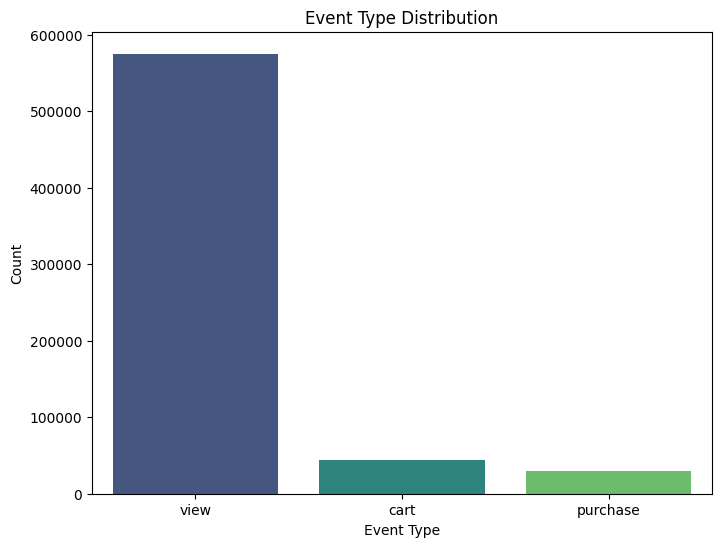

In [7]:
#Plot Event Type Distribution

print("Event Type Distribution Plot :\n")
# Event type distribution
event_counts = data['event_type'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=event_counts.index, y=event_counts.values, palette="viridis")
plt.title("Event Type Distribution")
plt.ylabel("Count")
plt.xlabel("Event Type")
plt.show()


In [6]:
# User-level behavior
user_summary = data.groupby('user_id').agg(
    total_spent=('price', 'sum'),
    visit_count=('user_session', 'nunique'),
    avg_price=('price', 'mean')
).reset_index()

print("\nUser-level Summary:")
print(user_summary.describe())



User-level Summary:
            user_id    total_spent    visit_count      avg_price
count  2.846280e+05  284628.000000  284628.000000  284628.000000
mean   1.515916e+18     385.866669       1.217277     150.337306
std    3.412764e+07    1529.303682       1.309514     320.750510
min    1.515916e+18       0.650000       0.000000       0.650000
25%    1.515916e+18      37.460000       1.000000      28.920000
50%    1.515916e+18      98.580000       1.000000      68.895000
75%    1.515916e+18     296.670000       1.000000     184.246667
max    1.515916e+18  209144.530000     244.000000   64771.060000


In [5]:
#Print unique users and their session

unique_users = data['user_id'].nunique()
unique_sessions = data['user_session'].nunique()
print(f"Number of unique users: {unique_users}")
print(f"Number of unique sessions: {unique_sessions}")

Number of unique users: 284628
Number of unique sessions: 346305


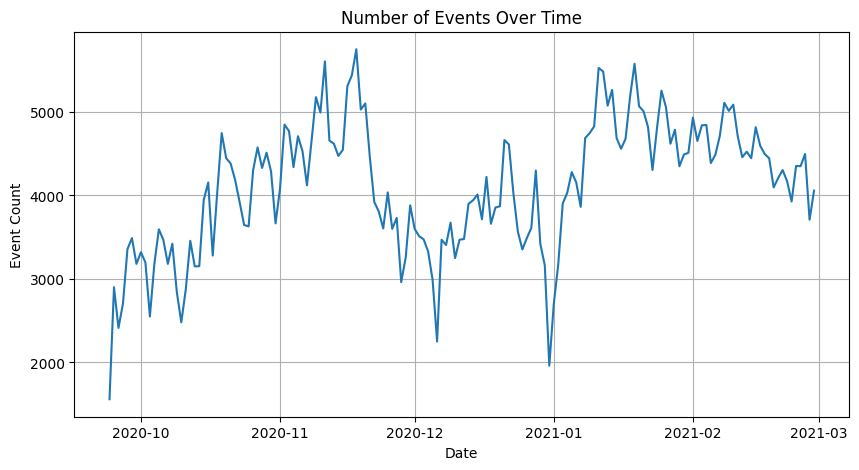

In [8]:
# Resample events by day
data['event_date'] = data['event_time'].dt.date
daily_events = data.groupby('event_date').size()

# Plot Number Of Events Over Time
plt.figure(figsize=(10, 5))
daily_events.plot()
plt.title('Number of Events Over Time')
plt.xlabel('Date')
plt.ylabel('Event Count')
plt.grid()
plt.show()


Top 10 Popular Brands Plot :



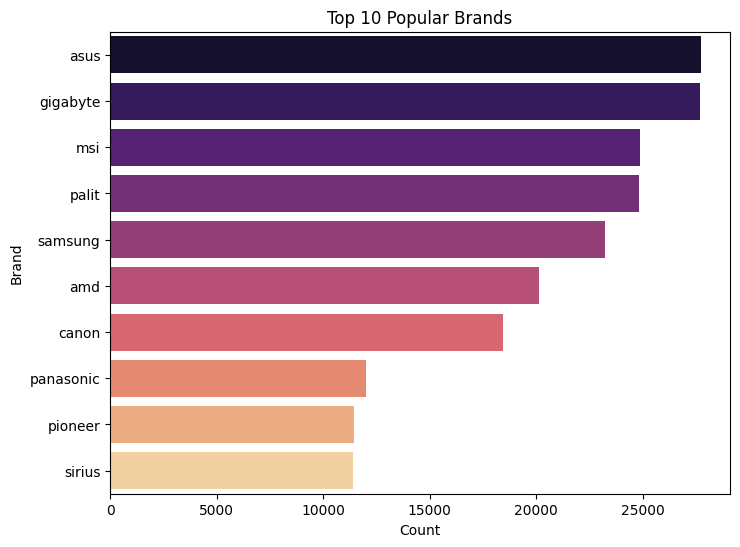

In [10]:
# Plot Top 10 Popular Brands

print("\nTop 10 Popular Brands Plot :\n")
# Brand popularity
brand_counts = data['brand'].value_counts().head(10)
plt.figure(figsize=(8, 6))
sns.barplot(x=brand_counts.values, y=brand_counts.index, palette="magma")
plt.title("Top 10 Popular Brands")
plt.xlabel("Count")
plt.ylabel("Brand")
plt.show()

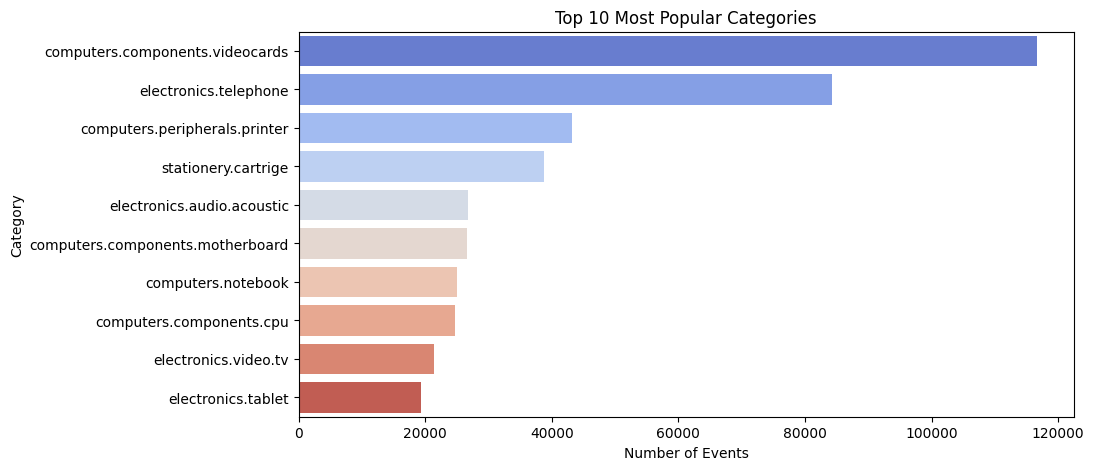

In [10]:
# Plot Top 10 Popular Categories

top_categories = data['category_code'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_categories.values, y=top_categories.index, palette='coolwarm')
plt.title('Top 10 Most Popular Categories')
plt.xlabel('Number of Events')
plt.ylabel('Category')
plt.show()

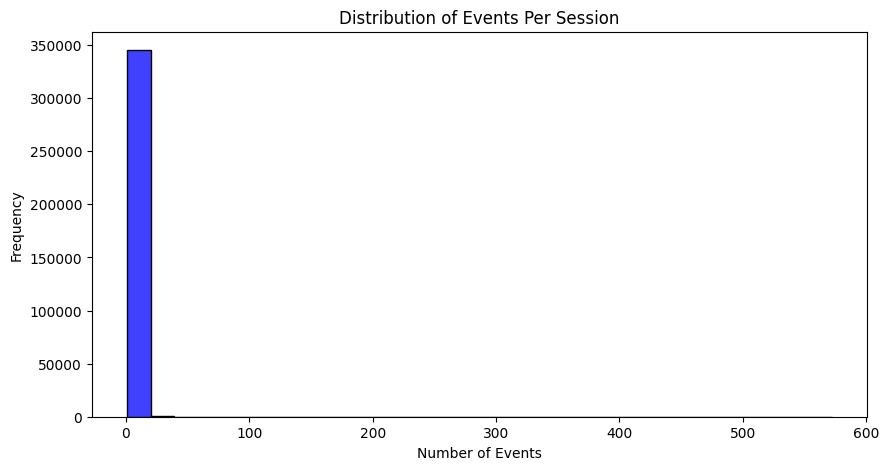

In [11]:
# Plot Distribution Of Events Per Session

session_counts = data.groupby('user_session').size()
plt.figure(figsize=(10, 5))
sns.histplot(session_counts, bins=30, kde=False, color='blue')
plt.title('Distribution of Events Per Session')
plt.xlabel('Number of Events')
plt.ylabel('Frequency')
plt.show()

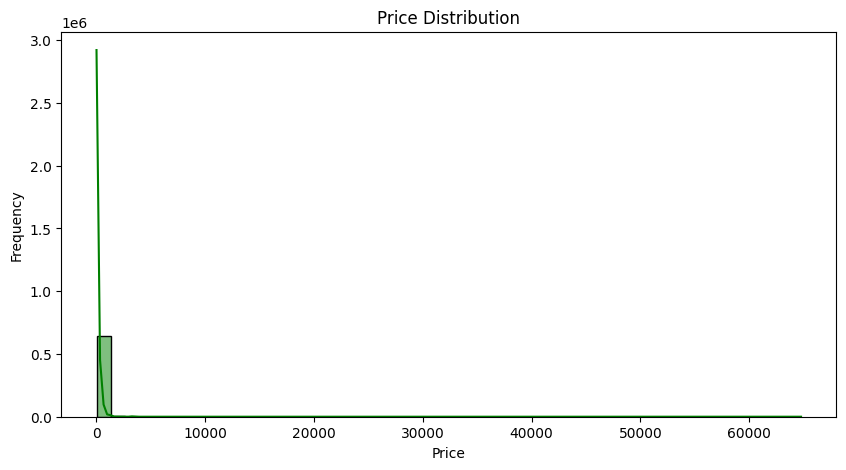

In [12]:
# Plot Price Distribution

plt.figure(figsize=(10, 5))
sns.histplot(data['price'], bins=50, kde=True, color='green')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

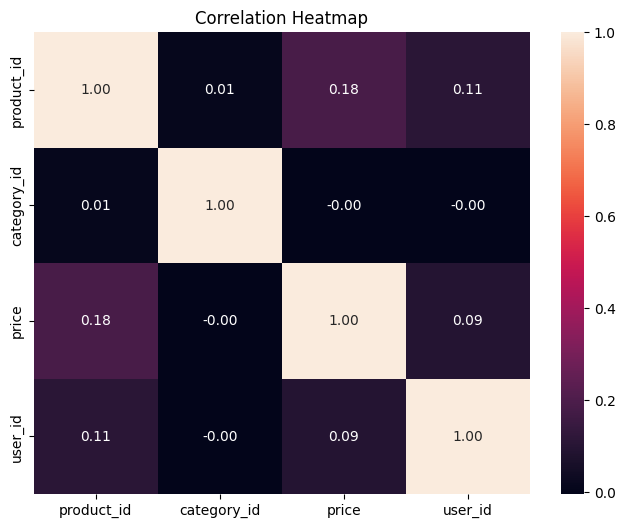

In [13]:
#Correlation Matrix

# Select only numerical columns
numerical_data = data.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix = numerical_data.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [14]:
#Total Number of Churn Users & Non-Churn Users

from datetime import timedelta

# Define churn threshold (e.g., 30 days of inactivity)
last_event_time = data['event_time'].max()
churn_threshold = last_event_time - timedelta(days=30)

# Identify churned users
churned_users = data.groupby('user_id').agg(last_purchase=('event_time', 'max')).reset_index()
churned_users['is_churned'] = churned_users['last_purchase'] < churn_threshold

# Count churned and non-churned users
churned_count = churned_users['is_churned'].sum()
non_churned_count = (~churned_users['is_churned']).sum()

print(f"Total Churned Users: {churned_count}")
print(f"Total Non-Churned Users: {non_churned_count}")


Total Churned Users: 227564
Total Non-Churned Users: 57064


In [15]:
#User level features

# Example feature: Recency, Frequency, Monetary
rfm = data.groupby('user_id').agg(
    recency=('event_time', lambda x: (last_event_time - x.max()).days),
    frequency=('user_session', 'nunique'),
    monetary=('price', 'sum')
).reset_index()

# If no merge is required and `rfm` is the final DataFrame:
features = rfm

print("\nUser-level Features:")
print(features.head())



User-level Features:
               user_id  recency  frequency  monetary
0  1515915625353226922      122          1     76.48
1  1515915625353230683       78          4    814.93
2  1515915625353230922      149          1    274.40
3  1515915625353234047       10          1   5467.71
4  1515915625353236157       17          1     52.49


In [16]:
# View-to-Cart Ratio & Cart-to-Purchase-Ratio
view_cart = data.pivot_table(index='user_id', columns='event_type', values='event_time', aggfunc='count').fillna(0)
view_cart['view_to_cart_ratio'] = view_cart['view'] / (view_cart['cart'] + 1)  # Avoid division by zero
view_cart['cart_to_purchase_ratio'] = view_cart['cart'] / (view_cart['purchase'] + 1)
view_cart.head()

event_type,cart,purchase,view,view_to_cart_ratio,cart_to_purchase_ratio
user_id,,,,,
1515915625353226922,0.0,0.0,1.0,1.0,0.0
1515915625353230683,0.0,0.0,13.0,13.0,0.0
1515915625353230922,0.0,0.0,1.0,1.0,0.0
1515915625353234047,0.0,0.0,35.0,35.0,0.0
1515915625353236157,0.0,0.0,1.0,1.0,0.0


In [17]:
# Check the resulting features DataFrame
print("\nChurned Users DataFrame (First 5 Rows):")
print(churned_users.head())


Churned Users DataFrame (First 5 Rows):
               user_id             last_purchase  is_churned
0  1515915625353226922 2020-10-29 11:28:35+00:00        True
1  1515915625353230683 2020-12-12 10:33:09+00:00        True
2  1515915625353230922 2020-10-02 08:23:40+00:00        True
3  1515915625353234047 2021-02-18 09:11:44+00:00       False
4  1515915625353236157 2021-02-11 15:50:40+00:00       False


In [18]:
## building a random forest model for data frame

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Merge 'is_churned' into features
features = pd.merge(features, churned_users[['user_id', 'is_churned']], on='user_id', how='inner')

# Prepare data
X = features.drop(['user_id', 'is_churned'], axis=1)
y = features['is_churned']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred)}")



Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00     11520
        True       1.00      1.00      1.00     45406

    accuracy                           1.00     56926
   macro avg       1.00      1.00      1.00     56926
weighted avg       1.00      1.00      1.00     56926

ROC AUC Score: 1.0


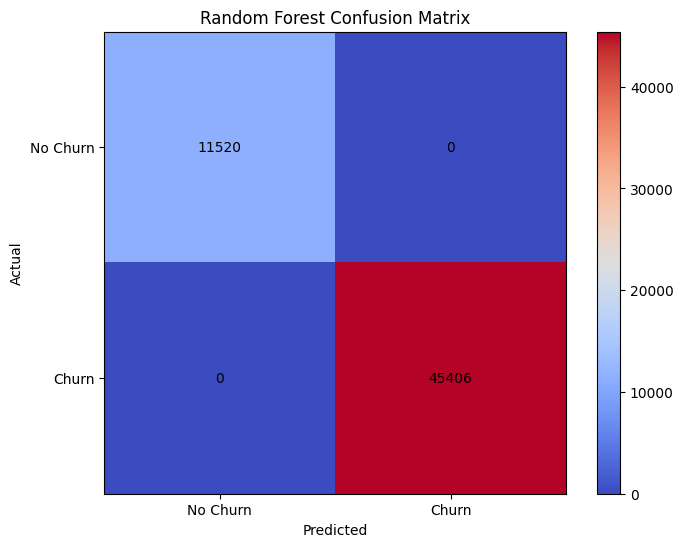

In [19]:
# Confusion matrix

from sklearn import metrics

cm_rf =metrics .confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(cm_rf, cmap='coolwarm', interpolation='nearest')
plt.title('Random Forest Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0, 1], ['No Churn', 'Churn'])
plt.yticks([0, 1], ['No Churn', 'Churn'])
plt.text(0, 0, cm_rf[0, 0], ha='center', va='center')
plt.text(0, 1, cm_rf[0, 1], ha='center', va='center')
plt.text(1, 0, cm_rf[1, 0], ha='center', va='center')
plt.text(1, 1, cm_rf[1, 1], ha='center', va='center')
plt.show()

In [20]:
# using logistic regression

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

models= LogisticRegression()
models.fit(X_train,y_train)

predict=models.predict(X_test)
prob=models.predict_proba(X_test)[:, 1]
print(metrics.classification_report(y_test,predict))
print("AUC-ROC score:", metrics.roc_auc_score(y_test, prob))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00     11520
        True       1.00      1.00      1.00     45406

    accuracy                           1.00     56926
   macro avg       1.00      1.00      1.00     56926
weighted avg       1.00      1.00      1.00     56926

AUC-ROC score: 1.0


In [21]:
#Feature & Co-efficient

coefficients=models.coef_[0]
coeffiecnt=pd.DataFrame({'Feature': X.columns,'Coefficient': coefficients})
coeffiecnt

,Feature,Coefficient
0,recency,9.896679
1,frequency,0.002759
2,monetary,-0.000011


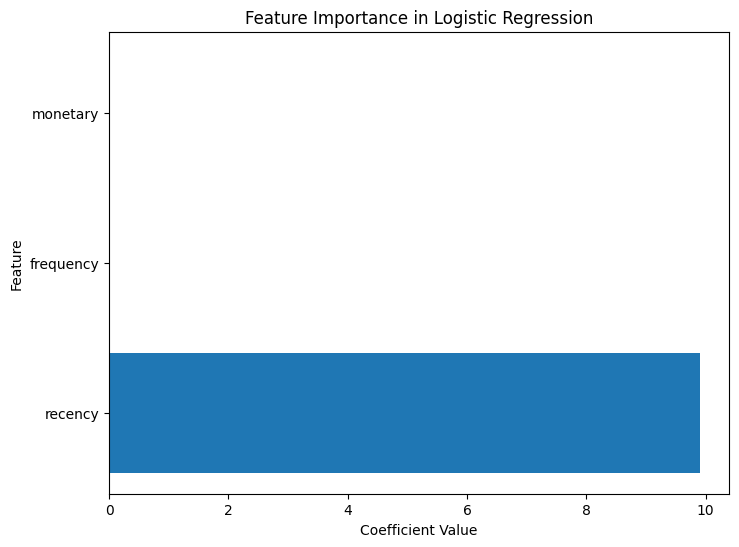

In [22]:
# Ploting the  feature importance bar graph
plt.figure(figsize=(8, 6))
plt.barh(coeffiecnt['Feature'], coeffiecnt['Coefficient'])
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance in Logistic Regression')
plt.show()

Bar chart for feature impotance



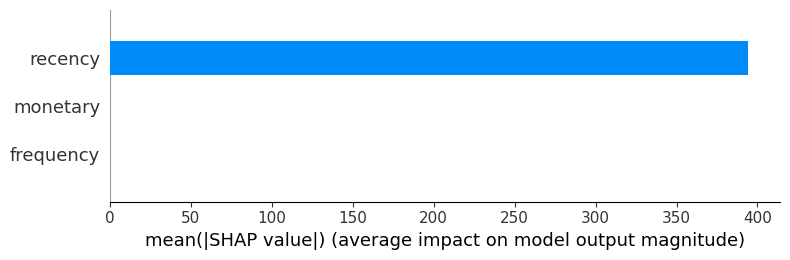


Beeswarm Plot



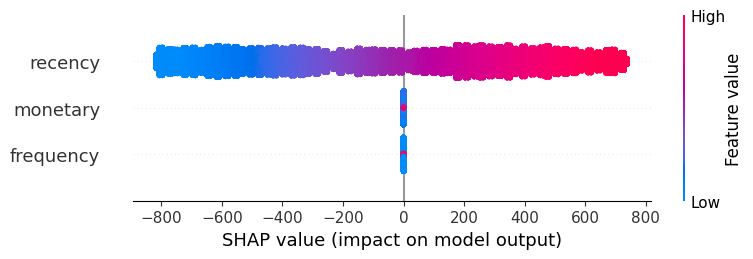

In [23]:
#Importnin SHAP & Plotting impotrant Feature

import shap
from sklearn.linear_model import LogisticRegression

# Ensure the model is fitted
model = LogisticRegression()
model.fit(X_train, y_train)

# SHAP Analysis
explainer = shap.LinearExplainer(model, X_train, feature_perturbation="interventional")
shap_values = explainer.shap_values(X_test)
print("Bar chart for feature impotance\n")
# Summary plot (bar chart for feature importance)
shap.summary_plot(shap_values, X_test, plot_type="bar")
print("\nBeeswarm Plot\n")
# Optional: Detailed beeswarm plot
shap.summary_plot(shap_values, X_test)


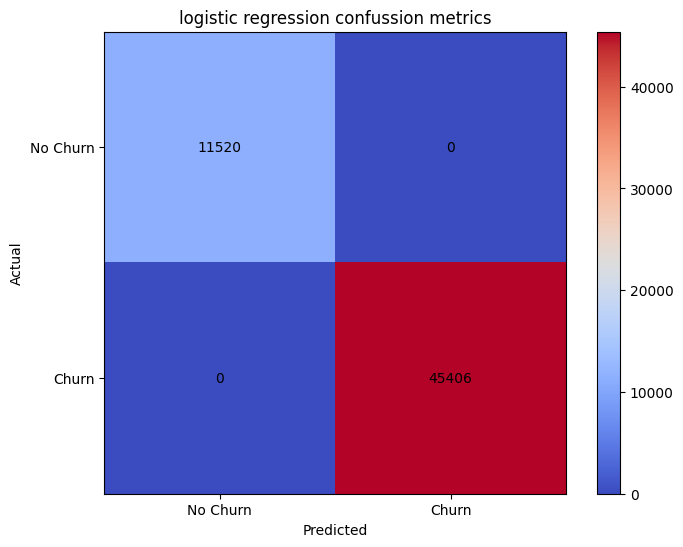

In [24]:
#Confusion Matrix for Logistic Regression

cm_lr = metrics.confusion_matrix(y_test, predict)
plt.figure(figsize=(8, 6))
plt.imshow(cm_rf, cmap='coolwarm', interpolation='nearest')
plt.title('logistic regression confussion metrics')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0, 1], ['No Churn', 'Churn'])
plt.yticks([0, 1], ['No Churn', 'Churn'])
plt.text(0, 0, cm_rf[0, 0], ha='center', va='center')
plt.text(0, 1, cm_rf[0, 1], ha='center', va='center')
plt.text(1, 0, cm_rf[1, 0], ha='center', va='center')
plt.text(1, 1, cm_rf[1, 1], ha='center', va='center')
plt.show()